In [2]:
import numpy as py 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path= "Fruits_Vegetables/validation"

In [4]:
img_width = 180
img_height = 180


In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [23]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


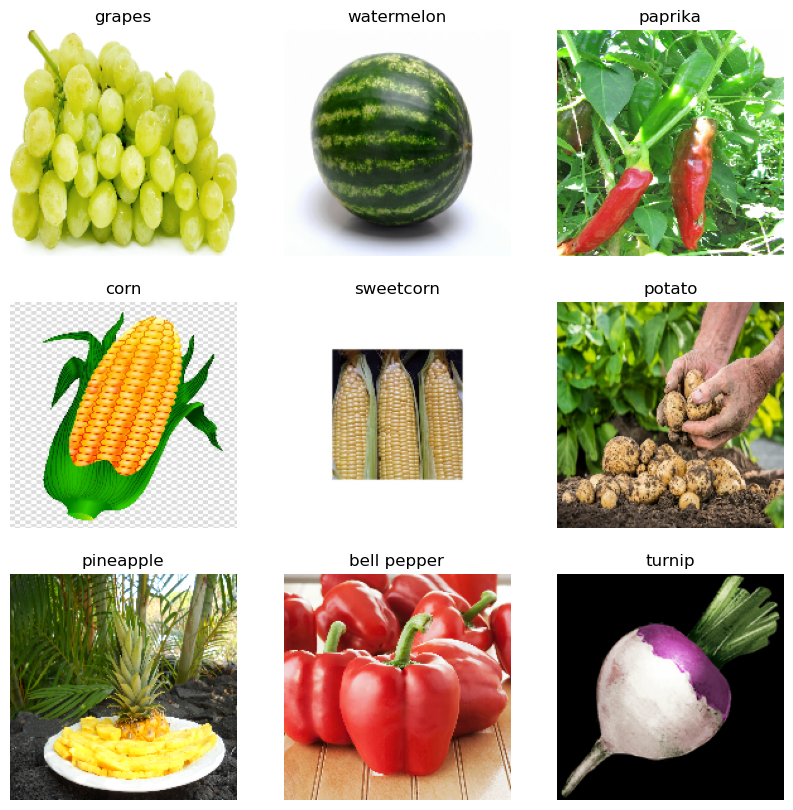

In [29]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [30]:
from tensorflow.keras.models import Sequential


In [33]:
model = Sequential(
[
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0,2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [37]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 815ms/step - accuracy: 0.0679 - loss: 7.8934 - val_accuracy: 0.3618 - val_loss: 2.3046
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 68s 670ms/step - accuracy: 0.3441 - loss: 2.4460 - val_accuracy: 0.8177 - val_loss: 0.9587
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 665ms/step - accuracy: 0.6641 - loss: 1.3332 - val_accuracy: 0.9117 - val_loss: 0.4994
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 675ms/step - accuracy: 0.8661 - loss: 0.5774 - val_accuracy: 0.9316 - val_loss: 0.4152
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 675ms/step - accuracy: 0.9485 - loss: 0.2904 - val_accuracy: 0.9487 - val_loss: 0.4514
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 676ms/step - accuracy: 0.9754 - loss: 0.1715 - val_accuracy: 0.9516 - val_loss: 0.3944
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 666ms/step - accuracy: 0.9863 - loss: 0.1215 - val_accuracy: 0.9630 - val_loss: 0.2488
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 67s 678ms/step - accuracy: 0.9880 - loss: 0.0752 - val_accu

Text(0.5, 1.0, 'Loss')

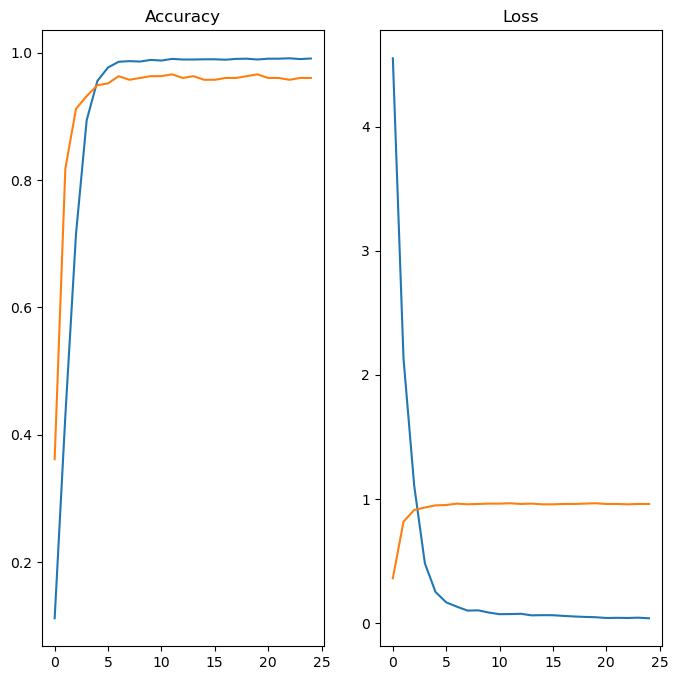

In [38]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label= 'Trainin Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label= 'Trainin Loss')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Loss')
plt.title('Loss')

In [51]:
image = 'beetroot.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr =  tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [52]:
predict = model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [53]:
score = tf.nn.softmax(predict)

In [54]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[py.argmax(score)], py.max(score)*100))

Veg/Fruit in image is beetroot with accuracy of 99.89


In [55]:
model.save('Image_classify.keras')